In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [3]:
csv_path = "hate_crime.csv"

hate_crime_df = pd.read_csv(csv_path)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [5]:
hate_crime_df["OFFENSE_NAME"].value_counts()[0:10]

Destruction/Damage/Vandalism of Property                 60413
Intimidation                                             56848
Simple Assault                                           36491
Aggravated Assault                                       20262
Robbery                                                   3337
Burglary/Breaking & Entering                              2569
Destruction/Damage/Vandalism of Property;Intimidation     1709
All Other Larceny                                         1493
Arson                                                     1058
Intimidation;Simple Assault                                823
Name: OFFENSE_NAME, dtype: int64

In [6]:
top_bias = pd.DataFrame(hate_crime_df["BIAS_DESC"].value_counts()[0:10]).reset_index()
top_bias = top_bias.rename(columns={"index": "BIAS_DESC", "BIAS_DESC": "COUNT"})
top_bias
top_bias_desc = top_bias["BIAS_DESC"].tolist()
top_bias_desc

['Anti-Black or African American',
 'Anti-Jewish',
 'Anti-White',
 'Anti-Gay (Male)',
 'Anti-Hispanic or Latino',
 'Anti-Other Race/Ethnicity/Ancestry',
 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
 'Anti-Asian',
 'Anti-Multiple Races, Group',
 'Anti-Lesbian (Female)']

In [7]:
top_biases = hate_crime_df.loc[hate_crime_df["BIAS_DESC"].isin(top_bias_desc)]
top_biases.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


<IPython.core.display.Javascript object>


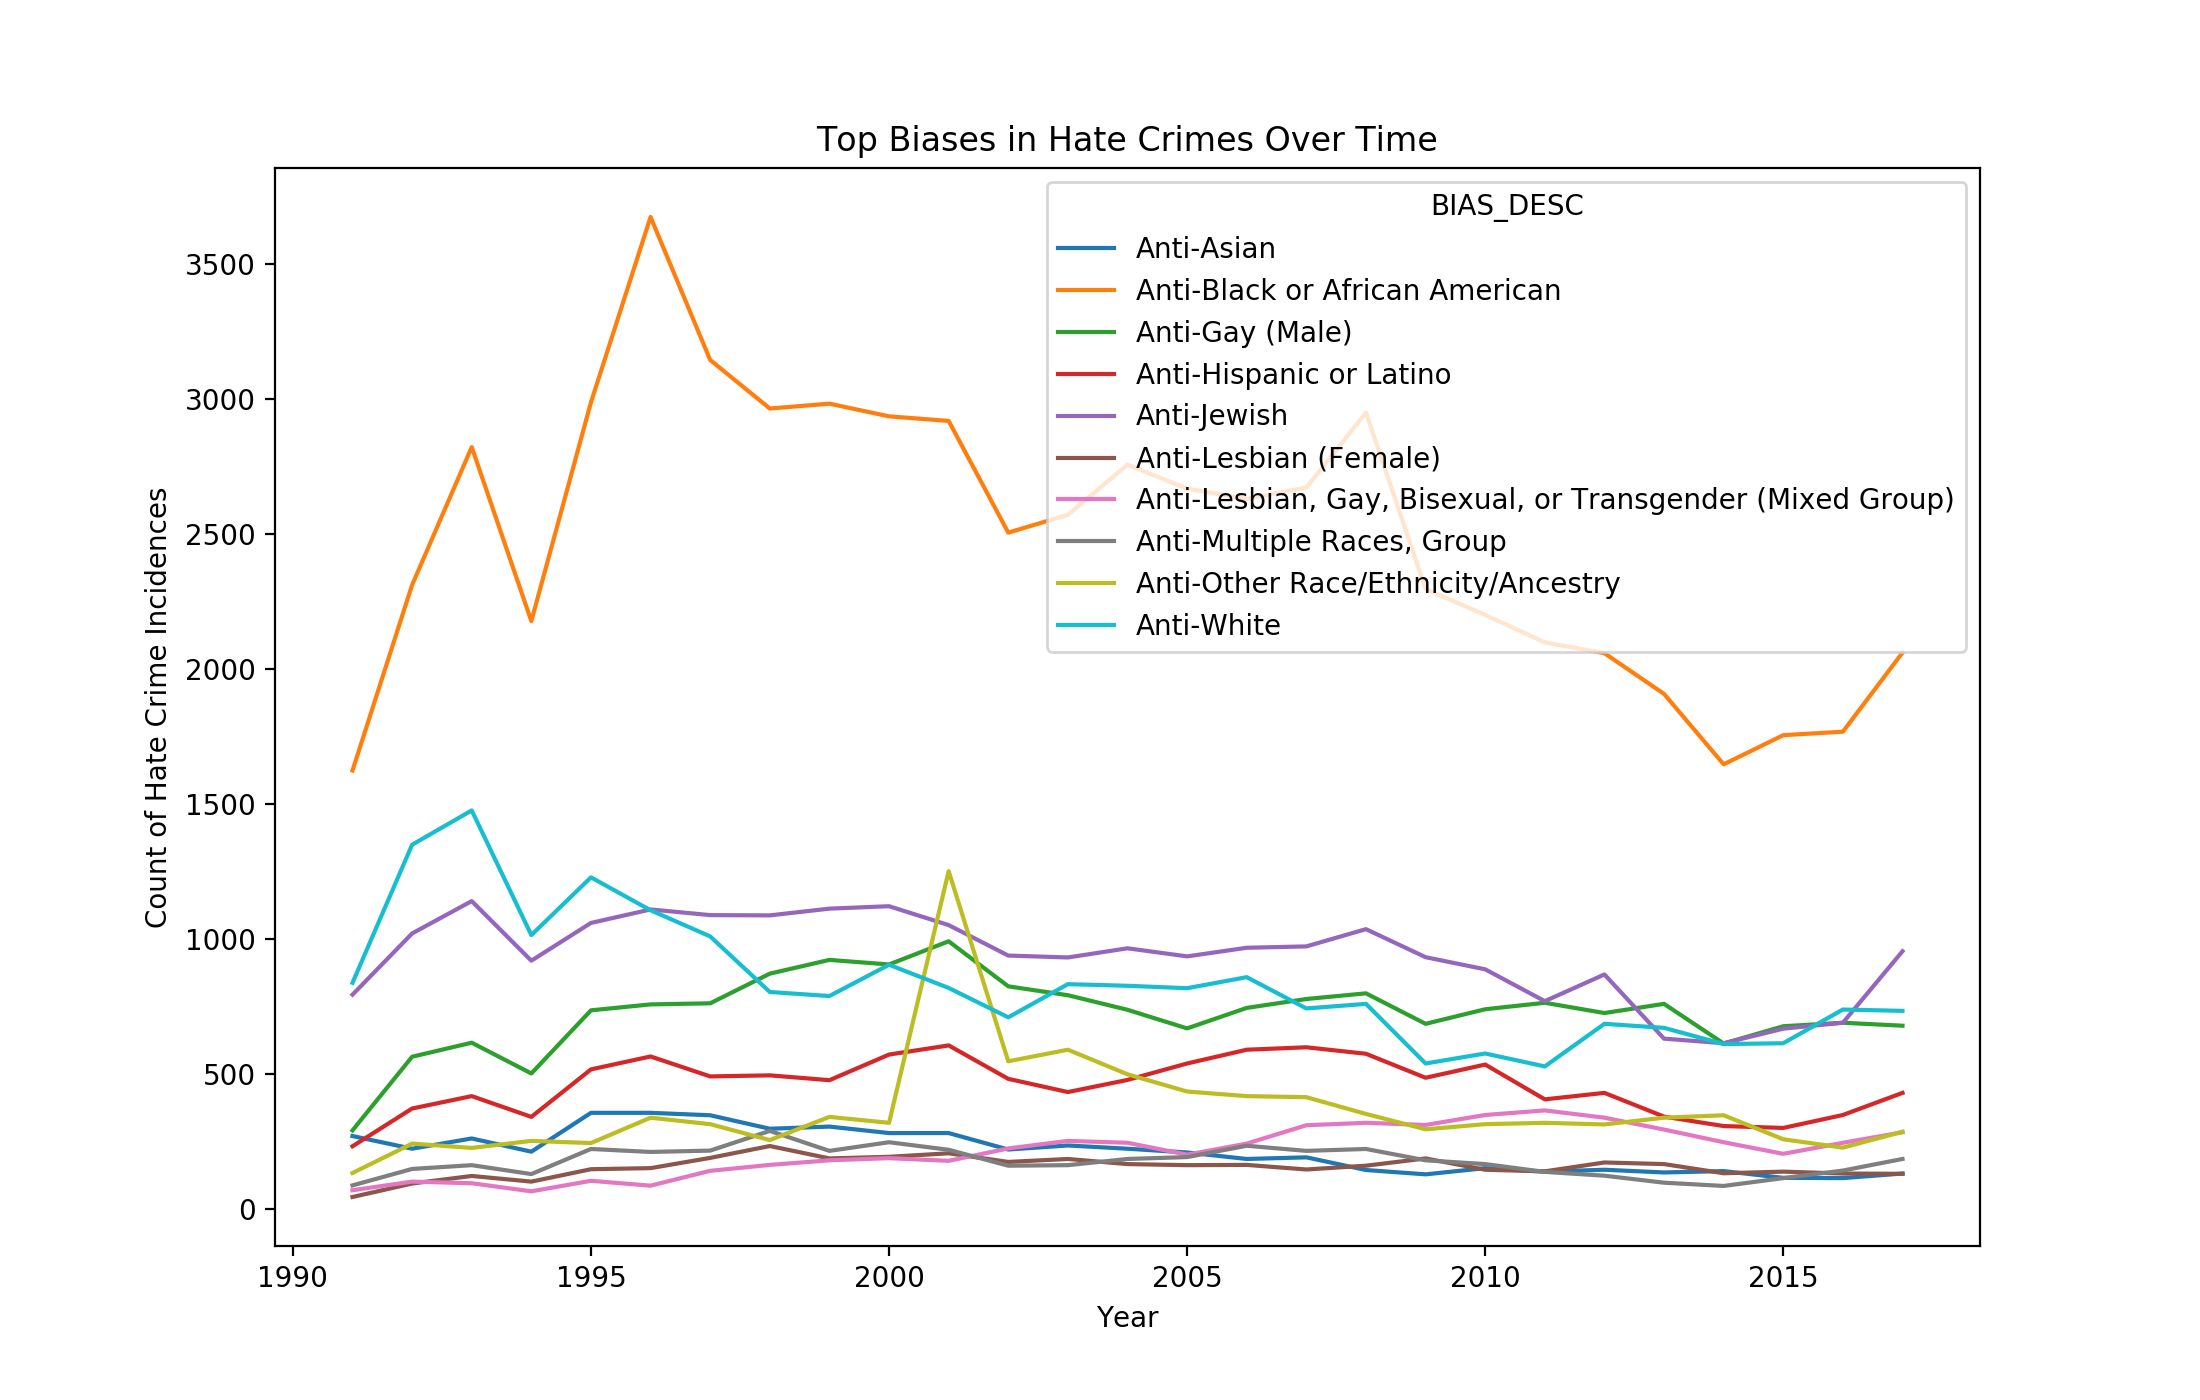

INCIDENT_ID   ORI  PUB_AGENCY_NAME  \
DATA_YEAR BIAS_DESC                                                            
1991      Anti-Asian                              269   269              269   
          Anti-Black or African American         1624  1624             1624   
          Anti-Gay (Male)                         290   290              290   
          Anti-Hispanic or Latino                 231   231              231   
          Anti-Jewish                             793   793              793   

                                          PUB_AGENCY_UNIT  AGENCY_TYPE_NAME  \
DATA_YEAR BIAS_DESC                                                           
1991      Anti-Asian                                    2               269   
          Anti-Black or African American               62              1624   
          Anti-Gay (Male)                              10               290   
          Anti-Hispanic or Latino                       3               231   
          Anti-Jewish                                  23               793   

                                          STATE_ABBR  STATE_NAME  \
DATA_YEAR BIAS_DESC                                                
1991      Anti-Asian                             269         269   
          Anti-Black or African American        1624        1624   
          Anti-Gay (Male)                        290         290   
          Anti-Hispanic or Latino                231         231   
          Anti-Jewish                            793         793   

                                          DIVISION_NAME  REGION_NAME  \
DATA_YEAR BIAS_DESC                                                    
1991      Anti-Asian                                269          269   
          Anti-Black or African American           1624         1624   
          Anti-Gay (Male)                           290          290   
          Anti-Hispanic or Latino                   231          231   
          Anti-Jewish                               793          793   

                                          POPULATION_GROUP_CODE  \
DATA_YEAR BIAS_DESC                                               
1991      Anti-Asian                                        269   
          Anti-Black or African American                   1624   
          Anti-Gay (Male)                                   290   
          Anti-Hispanic or Latino                           231   
          Anti-Jewish                                       793   

                                              ...        \
DATA_YEAR BIAS_DESC                           ...         
1991      Anti-Asian                          ...         
          Anti-Black or African American      ...         
          Anti-Gay (Male)                     ...         
          Anti-Hispanic or Latino             ...         
          Anti-Jewish                         ...         

                                          JUVENILE_OFFENDER_COUNT  \
DATA_YEAR BIAS_DESC                                                 
1991      Anti-Asian                                            0   
          Anti-Black or African American                        0   
          Anti-Gay (Male)                                       0   
          Anti-Hispanic or Latino                               0   
          Anti-Jewish                                           0   

                                          OFFENDER_RACE  OFFENDER_ETHNICITY  \
DATA_YEAR BIAS_DESC                                                           
1991      Anti-Asian                                269                   0   
          Anti-Black or African American           1624                   0   
          Anti-Gay (Male)                           290                   0   
          Anti-Hispanic or Latino                   231                   0   
          Anti-Jewish                               793                   0   

                       

In [8]:
fig, ax = plt.subplots(figsize=(11,7))
top_biases.groupby(['DATA_YEAR','BIAS_DESC']).count()['INCIDENT_ID'].unstack().plot(ax=ax)
plt.title("Top Biases in Hate Crimes Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Hate Crime Incidences")
plt.savefig("Top_Biases_Over_Time.png")
plt.show()
top_biases_grouped = top_biases.groupby(["DATA_YEAR", "BIAS_DESC"])
top_biases_grouped.count().head()

In [9]:
top_offense = pd.DataFrame(hate_crime_df["OFFENSE_NAME"].value_counts()[0:6]).reset_index()
top_offense = top_offense.rename(columns={"index": "OFFENSE_NAME", "OFFENSE_NAME": "COUNT"})
top_offense
top_offense_desc = top_offense["OFFENSE_NAME"].tolist()
top_offense_desc

['Destruction/Damage/Vandalism of Property',
 'Intimidation',
 'Simple Assault',
 'Aggravated Assault',
 'Robbery',
 'Burglary/Breaking & Entering']

In [10]:
top_offenses = hate_crime_df.loc[hate_crime_df["OFFENSE_NAME"].isin(top_offense_desc)]
top_offenses.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
5,3018,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S


<IPython.core.display.Javascript object>


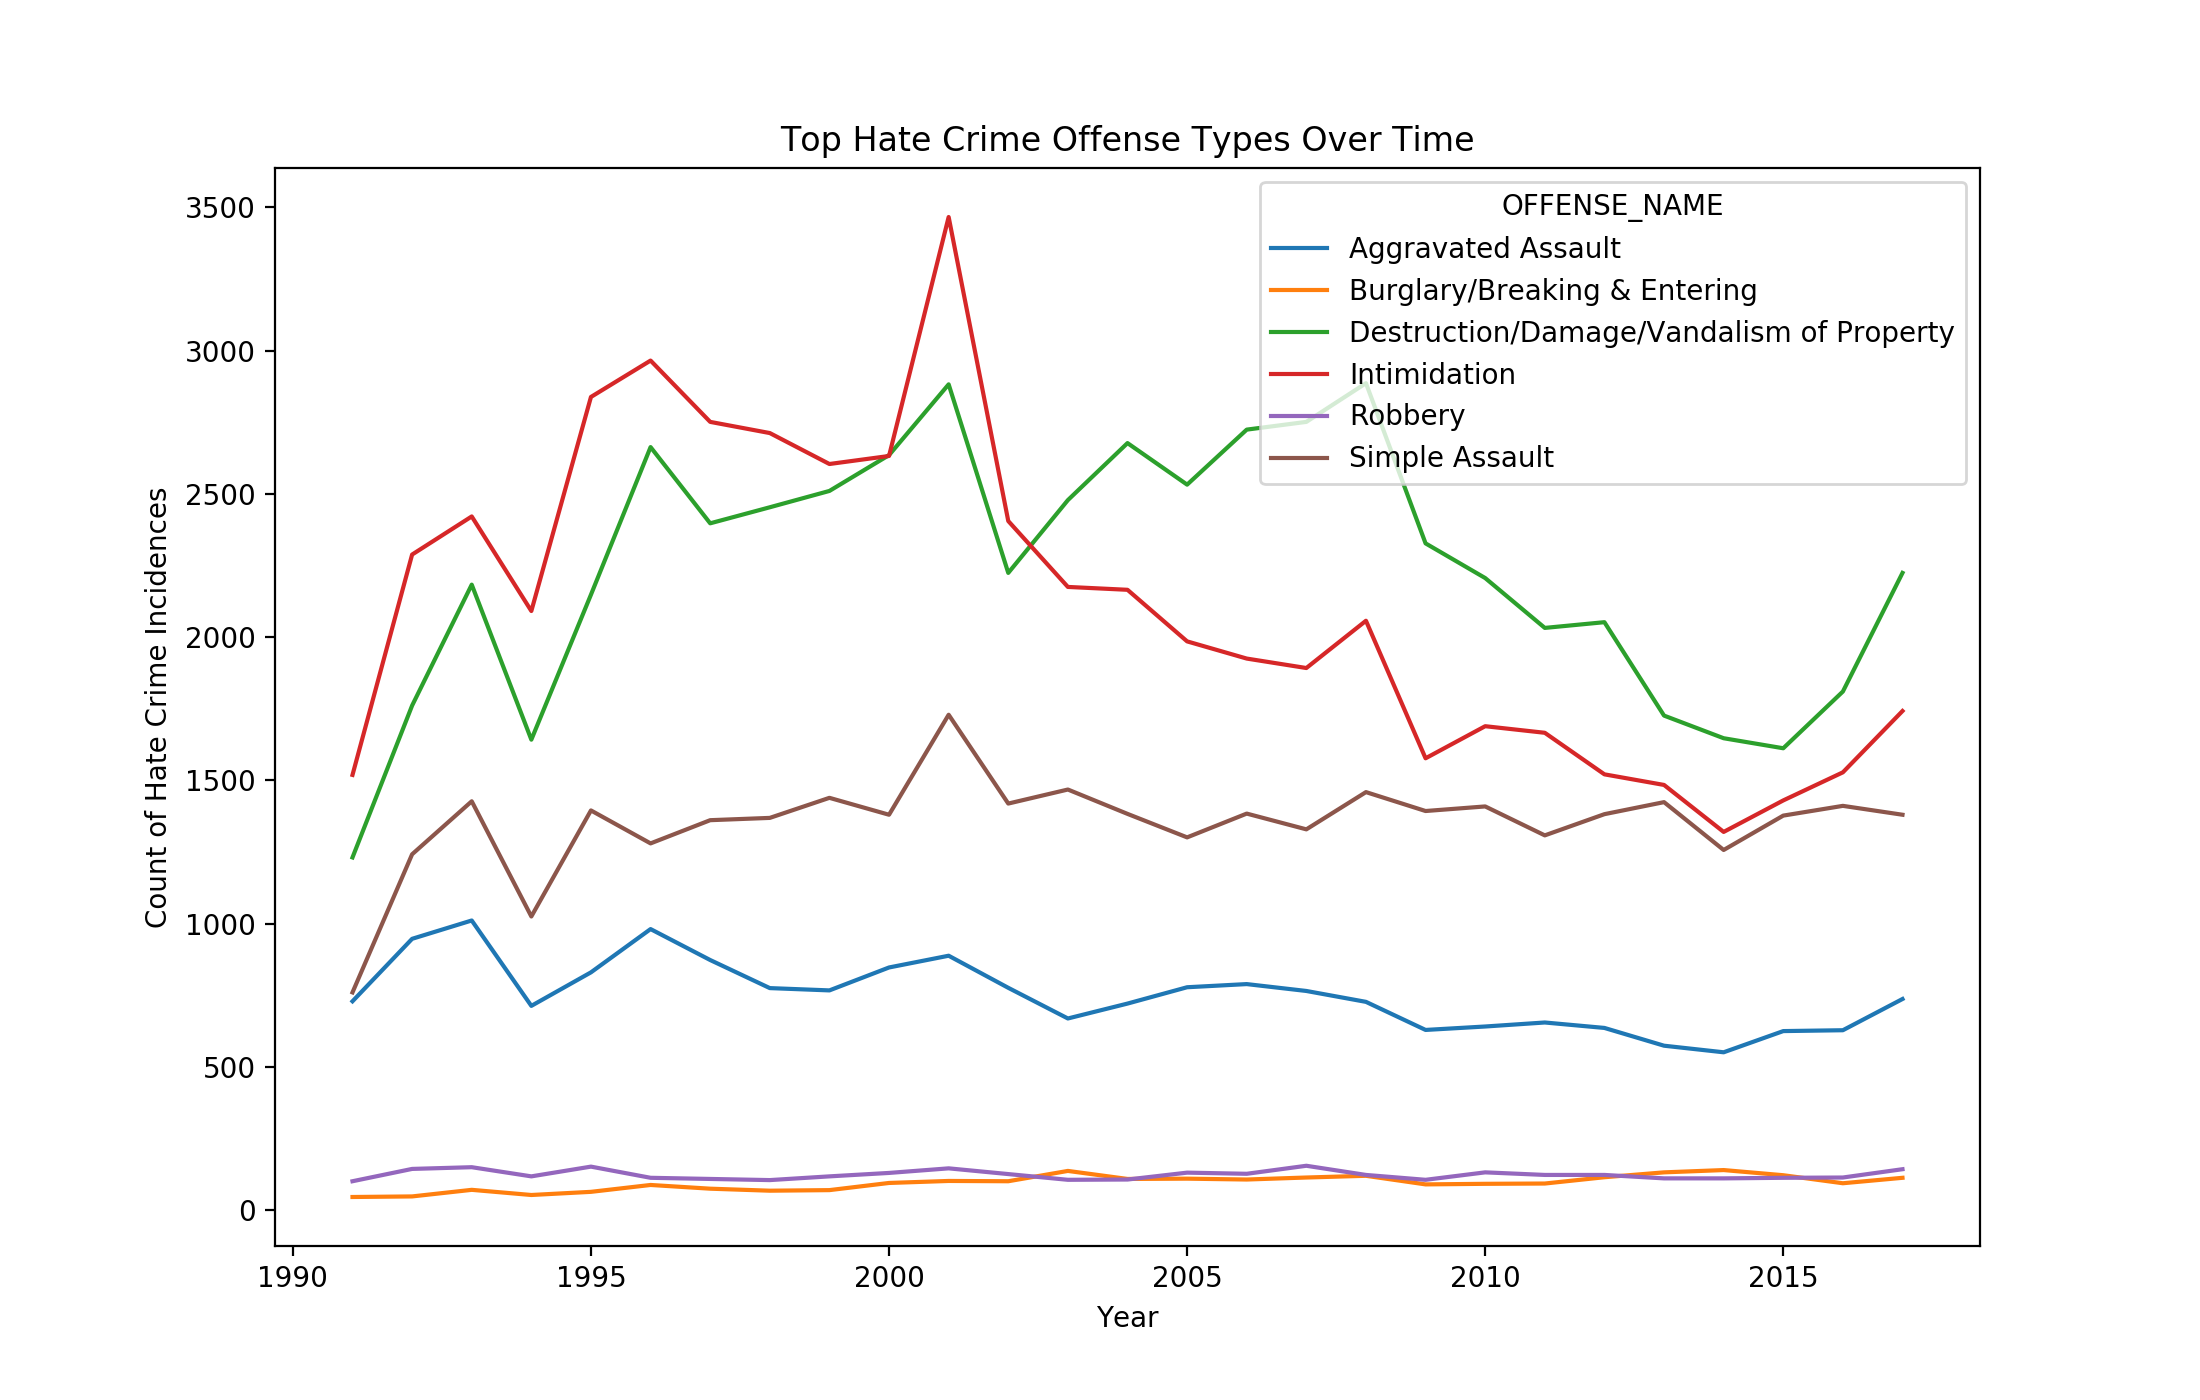

In [11]:
fig, ax = plt.subplots(figsize=(11,7))
top_offenses.groupby(['DATA_YEAR','OFFENSE_NAME']).count()['INCIDENT_ID'].unstack().plot(ax=ax)
plt.title("Top Hate Crime Offense Types Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Hate Crime Incidences")
plt.savefig("Top_Offenses_Over_Time.png")
plt.show()

In [12]:
months = []
for x in hate_crime_df["INCIDENT_DATE"].tolist():
    months.append(x.split("-")[1])
months[0:9]

['AUG', 'SEP', 'JUL', 'DEC', 'DEC', 'JUL', 'NOV', 'JUL', 'OCT']

In [13]:
d = {}
for i in months:
    if i in d:
        d[i] = d[i]+1
    else:
        d[i] = 1

In [14]:
crimes_by_month = pd.DataFrame({"Year": hate_crime_df['DATA_YEAR'], "Month": months})
crimes_by_month["Month"] = pd.Categorical(crimes_by_month["Month"], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
crimes_by_month.sort_values(["Year", "Month"])
crimes_by_month.head()

,Year,Month
0,1991,AUG
1,1991,SEP
2,1991,JUL
3,1991,DEC
4,1991,DEC


In [15]:
crimes_by_month = pd.DataFrame({"Year": hate_crime_df['DATA_YEAR'], "Month": months})
crimes_by_month["Month"] = pd.Categorical(crimes_by_month["Month"], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
crimes_by_month = crimes_by_month.sort_values(["Year", "Month"])
crimes_by_month.head()

,Year,Month
12,1991,JAN
13,1991,JAN
14,1991,JAN
58,1991,JAN
87,1991,JAN


In [16]:
crimes_by_month["Count"] = 1
crimes_by_month.head()

,Year,Month,Count
12,1991,JAN,1
13,1991,JAN,1
14,1991,JAN,1
58,1991,JAN,1
87,1991,JAN,1


In [17]:
choose_years = crimes_by_month.loc[crimes_by_month["Year"].isin([1991, 1996, 2001, 2006, 2011, 2015, 2016, 2017])]
choose_years.head()

,Year,Month,Count
12,1991,JAN,1
13,1991,JAN,1
14,1991,JAN,1
58,1991,JAN,1
87,1991,JAN,1


<IPython.core.display.Javascript object>


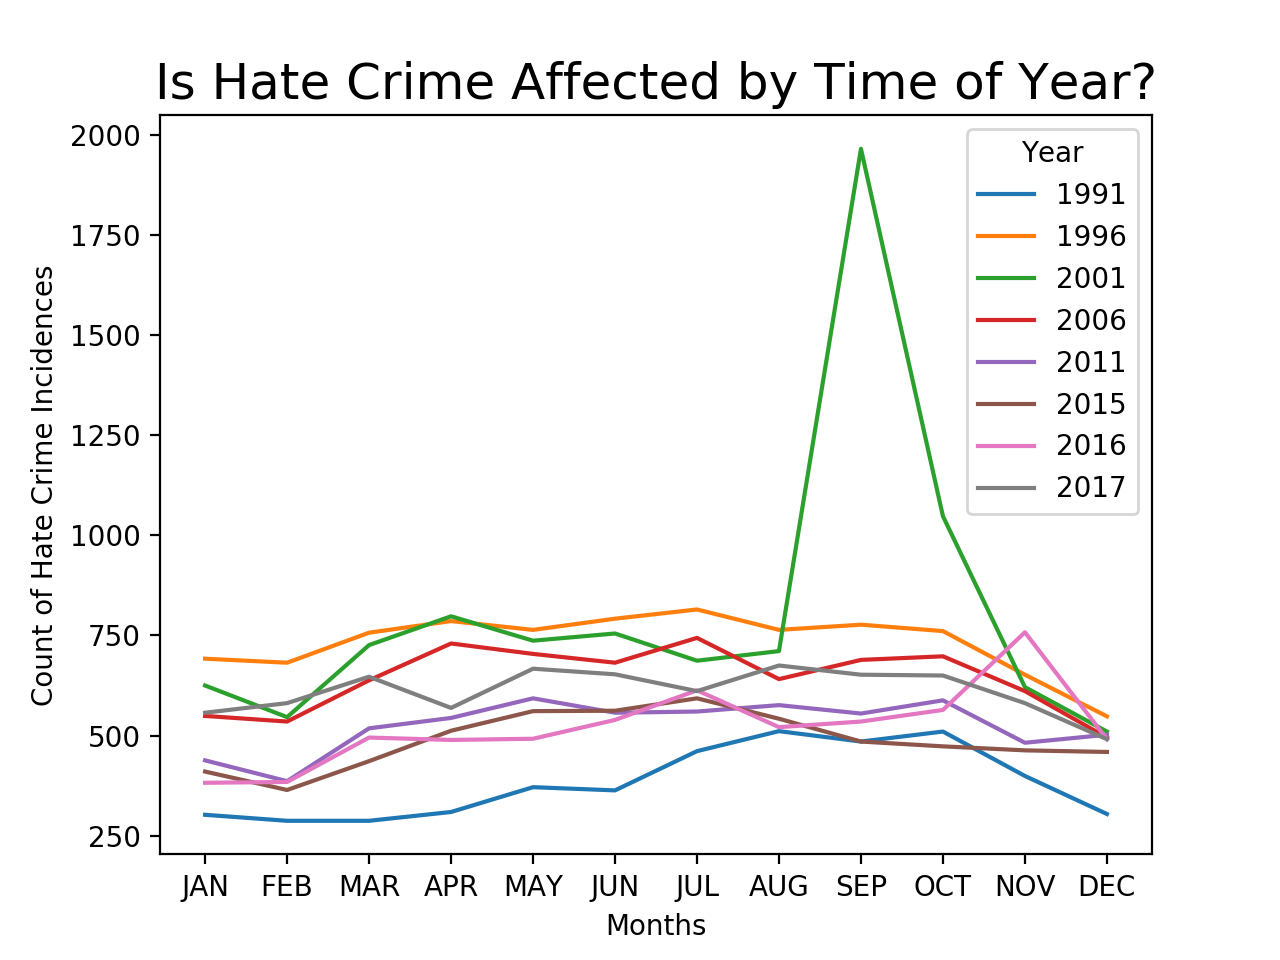

In [18]:
fig, ax4 = plt.subplots()
choose_years.groupby(["Month", "Year"]).count()['Count'].unstack().plot(ax=ax4)
tick_locations = np.arange(12)
plt.xticks(tick_locations, choose_years["Month"].unique())
plt.title("Is Hate Crime Affected by Time of Year?", fontsize=18)
plt.xlabel("Months")
plt.ylabel("Count of Hate Crime Incidences")
plt.savefig("Years_Divided_by_Month.png")
plt.show()

In [19]:
names = ["Rodney King Video", "LA Riots", "Bill Clinton Elected", "OJ Trial Starts", "9/11 Terrorist Attacks", 
         "President Obama Elected", "Hate Crimes Prevention Act", "FBI Began Reporting HC Motivated by Gender", 
        "Terrorist Attacks in Paris", "President Trump Elected"]
dates = ["1991", "1992", "1992", "1995", "2001", "2008", "2009", "2013", "2015", "2016"]

<IPython.core.display.Javascript object>


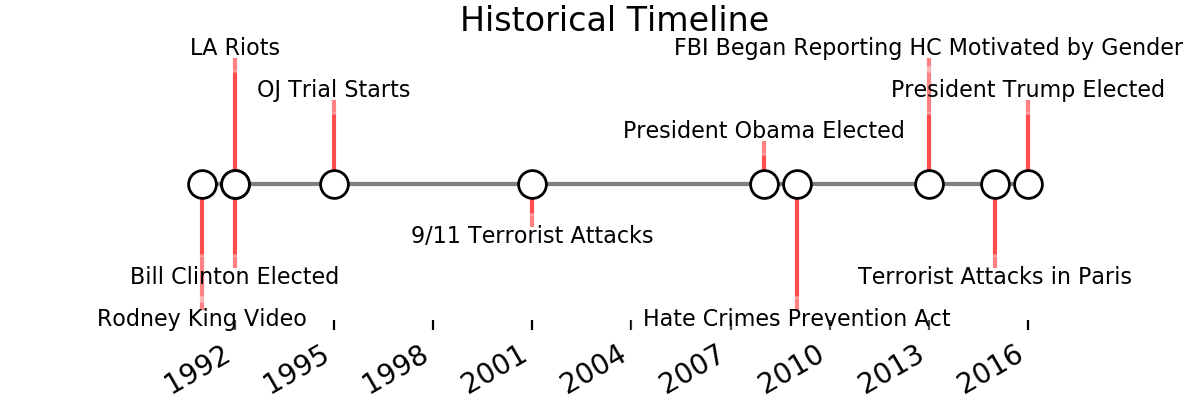

In [20]:
dates = [datetime.strptime(ii, "%Y") for ii in dates]

levels = np.array([-.03, .03, -.02, .02, -.01, .01])
fig, ax = plt.subplots(figsize=(6, 2))

start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)

    ax.plot((idate, idate), (0, level), c='r', alpha=.7)

    ax.text(idate, level, iname,
            horizontalalignment='center', verticalalignment=vert, fontsize=8,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Historical Timeline")

ax.get_xaxis().set_major_locator(mdates.YearLocator(3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
fig.autofmt_xdate()

plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.savefig("Historical_Events_Timeline.png")
plt.show()